# Sentiment Analysis using BERT
Bidirectional Encoder Representations from Transformers

In [ ]:
!nvidia-smi

Thu Jul 28 13:46:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 328 kB/s 
     |████████████████████████████████| 22.3 MB 302 kB/s 
     |████████████████████████████████| 981 kB 64.2 MB/s 
     |████████████████████████████████| 263 kB 90.1 MB/s 
     |████████████████████████████████| 2.8 MB 83.3 MB/s 
     |████████████████████████████████| 1.2 MB 83.9 MB/s 
     |████████████████████████████████| 468 kB 65.8 MB/s 
     |████████████████████████████████| 880 kB 71.5 MB/s 
     |████████████████████████████████| 3.3 MB 55.5 MB/s 
     |████████████████████████████████| 596 kB 77.0 MB/s 
     |████████████████████████████████| 101 kB 11.6 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.3-py3-none-any.whl size=25313110 sha256=2ff1a0e829a8cdc4ce9641b851171fe02b9cae35822f03a53ebd4518b57650fa
  Stored in directory: /root/.cache/pip/wheels/02/b2/23/62848f56f705788e6ad39f23f8c4b8127edbbe9daa14c9c91c
  

In [ ]:
pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 6.1 MB/s 


In [ ]:
import pandas as pd
import re
from pythainlp.tokenize import word_tokenize, Tokenizer

import numpy as np

import ktrain
from ktrain import text
# from collections import Counter

import seaborn as sn
import matplotlib.pyplot as plt

# import pickle as p
import plotly
import plotly.graph_objs as go

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

import string
from string import punctuation

#########################
from pythainlp.corpus.common import thai_words

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from pythainlp.corpus import thai_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(os.getcwd())

/content


In [ ]:
data_path = 'drive/My Drive/source'
print(os.listdir(data_path))

['#โควิด19.csv', 'no.csv', '.ipynb_checkpoints', '10005.gsheet', '10005.csv', '9224.csv', '9224k.csv', '9224t.csv', '9224k-nozero (1).csv', 'รวม 10005.xlsx', 'รวม 10005.csv', 'รวม 10005++.xlsx', 'รวม 10005++.csv', 'รวม_10005_more.xlsx', 'รวม_10005_more.csv', 'รวม 10005 - Copy.csv', 'รวม 11046 eng.csv', 'รวม 11046.csv']


In [ ]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

#โควิด19.csv
no.csv
.ipynb_checkpoints
10005.gsheet
10005.csv
9224.csv
9224k.csv
9224t.csv
9224k-nozero (1).csv
รวม 10005.xlsx
รวม 10005.csv
รวม 10005++.xlsx
รวม 10005++.csv
รวม_10005_more.xlsx
รวม_10005_more.csv
รวม 10005 - Copy.csv
รวม 11046 eng.csv
รวม 11046.csv


In [ ]:
import pandas as pd

In [ ]:
file_name = data_path+'/9224k.csv'
file_name

'drive/My Drive/source/9224k.csv'

In [ ]:
df = pd.read_csv(file_name,encoding ='utf-8',  usecols=[0,2] ,names=['sentence','sentiment'], header=0)

In [ ]:
df.head()

,sentence,sentiment
0,ด่วน! \n\n23:20 ศูนย์ปฏิบัติการ COVID-19 จังหว...,ไม่เดือดร้อน
1,มาตรการ​ออกมาแล้วคับ... ปฏิบัติ​ตาม\n\n#Covid_...,ไม่เดือดร้อน
2,ด่วน! \n\n23:12 ศูนย์ปฏิบัติการ COVID-19 จังหว...,ไม่เดือดร้อน
3,ด่วน! แม่ค้าขายกล้วยติดโควิด\n\n23:03 ศูนย์ปฏิ...,ไม่เดือดร้อน
4,ด่วน! ระวังคนชอบดื่ม\n\n22:58 ศูนย์ปฏิบัติการ ...,ไม่เดือดร้อน


In [ ]:
df = df.drop_duplicates()

In [ ]:
เดือดร้อน_df = df[df.sentiment == "เดือดร้อน"]
เดือดร้อน_df.head()

,sentence,sentiment
11,และแล้วธุรกิจสีเทา ของคนมีสี ก็ส่งผลกระทบกับ #...,เดือดร้อน
18,ผู้ป่วยรายวันเยอะขนาดนี้ แล้วเราจะรอดหรอวะ #โค...,เดือดร้อน
19,เปิดมาปีแรก​ ยิมก็จะปิดเพราะ​ covid​ อีกแล้ววว...,เดือดร้อน
20,#azumasoba รีบทานก่อนโดนสั่งปิด #โควิด https:/...,เดือดร้อน
25,หลังปีใหม่ เรากับแฟนคิดตรงกันว่าหนักแน่ ขอให้...,เดือดร้อน


In [ ]:
print(len(เดือดร้อน_df))

3066


In [ ]:
ไม่เดือดร้อน_df = df[df.sentiment == "ไม่เดือดร้อน"]
ไม่เดือดร้อน_df.head()

,sentence,sentiment
0,ด่วน! \n\n23:20 ศูนย์ปฏิบัติการ COVID-19 จังหว...,ไม่เดือดร้อน
1,มาตรการ​ออกมาแล้วคับ... ปฏิบัติ​ตาม\n\n#Covid_...,ไม่เดือดร้อน
2,ด่วน! \n\n23:12 ศูนย์ปฏิบัติการ COVID-19 จังหว...,ไม่เดือดร้อน
3,ด่วน! แม่ค้าขายกล้วยติดโควิด\n\n23:03 ศูนย์ปฏิ...,ไม่เดือดร้อน
4,ด่วน! ระวังคนชอบดื่ม\n\n22:58 ศูนย์ปฏิบัติการ ...,ไม่เดือดร้อน


In [ ]:
print(len(ไม่เดือดร้อน_df))

5877


In [ ]:
sentiment_df = pd.concat([ไม่เดือดร้อน_df, เดือดร้อน_df])
sentiment_df.sample(5)

,sentence,sentiment
6184,ทวดนี่เป็นโควิด อายุ90กว่า กว่าจะได้เข้ารพก็ผ่...,เดือดร้อน
3528,ใกล้ชิด ผู้ติดเชื้อโควิด 12วันแล้ว\nยังไม่มีอา...,เดือดร้อน
7090,COVID-19 ไม่ใช่อุปสรรคในการให้บริการ https://t...,ไม่เดือดร้อน
6967,ข่าวด่วน!! วันนี้สหรัฐอเมริกาติดเชื้อโควิดเกิน...,ไม่เดือดร้อน
7193,🎂H B D 🎂ตัวฉันเอง🥰🥰\nไม่ขออะไรขอแค่เดีมทางกลับ...,ไม่เดือดร้อน


In [ ]:
sentiment_df['clean_sentence'] = sentiment_df['sentence'].fillna('').apply(lambda x: x.lower())
sentiment_df.head()

,sentence,sentiment,clean_sentence
0,ด่วน! \n\n23:20 ศูนย์ปฏิบัติการ COVID-19 จังหว...,ไม่เดือดร้อน,ด่วน! \n\n23:20 ศูนย์ปฏิบัติการ covid-19 จังหว...
1,มาตรการ​ออกมาแล้วคับ... ปฏิบัติ​ตาม\n\n#Covid_...,ไม่เดือดร้อน,มาตรการ​ออกมาแล้วคับ... ปฏิบัติ​ตาม\n\n#covid_...
2,ด่วน! \n\n23:12 ศูนย์ปฏิบัติการ COVID-19 จังหว...,ไม่เดือดร้อน,ด่วน! \n\n23:12 ศูนย์ปฏิบัติการ covid-19 จังหว...
3,ด่วน! แม่ค้าขายกล้วยติดโควิด\n\n23:03 ศูนย์ปฏิ...,ไม่เดือดร้อน,ด่วน! แม่ค้าขายกล้วยติดโควิด\n\n23:03 ศูนย์ปฏิ...
4,ด่วน! ระวังคนชอบดื่ม\n\n22:58 ศูนย์ปฏิบัติการ ...,ไม่เดือดร้อน,ด่วน! ระวังคนชอบดื่ม\n\n22:58 ศูนย์ปฏิบัติการ ...


In [ ]:
pun = '"#\'()*,-.;<=>[\\]^_`{|}~'
pun

'"#\'()*,-.;<=>[\\]^_`{|}~'

In [ ]:
sentiment_df['clean_comments'] = sentiment_df['clean_sentence'].str.replace(r'[%s]' % (pun), '', regex=True)

In [ ]:
sentiment_df.sample(5)

,sentence,sentiment,clean_sentence,clean_comments
7345,เข้าออฟฟิศทีไร ต้องมาฟังวนลูป คนติดโควิด ค่ารั...,เดือดร้อน,เข้าออฟฟิศทีไร ต้องมาฟังวนลูป คนติดโควิด ค่ารั...,เข้าออฟฟิศทีไร ต้องมาฟังวนลูป คนติดโควิด ค่ารั...
1724,✅โปรโควิดวันนี้ - 31มีนาคม 64 เริ่มต้น 690/วัน...,ไม่เดือดร้อน,✅โปรโควิดวันนี้ - 31มีนาคม 64 เริ่มต้น 690/วัน...,✅โปรโควิดวันนี้ 31มีนาคม 64 เริ่มต้น 690/วันถ...
8854,"#โควิดวันนี้ 29 มิถุนายน64 ติดเชื้อใหม่รวม 4,6...",ไม่เดือดร้อน,"#โควิดวันนี้ 29 มิถุนายน64 ติดเชื้อใหม่รวม 4,6...",โควิดวันนี้ 29 มิถุนายน64 ติดเชื้อใหม่รวม 4662...
2526,รอหมดโควิดจะตามรอยให้หมดทั้งรายการนี้ ทั้งปรมจ...,ไม่เดือดร้อน,รอหมดโควิดจะตามรอยให้หมดทั้งรายการนี้ ทั้งปรมจ...,รอหมดโควิดจะตามรอยให้หมดทั้งรายการนี้ ทั้งปรมจ...
4625,โอเคลูกกุมีปอดคนเดียว อีค่ายผีมันเลยกลัวโควิด ...,ไม่เดือดร้อน,โอเคลูกกุมีปอดคนเดียว อีค่ายผีมันเลยกลัวโควิด ...,โอเคลูกกุมีปอดคนเดียว อีค่ายผีมันเลยกลัวโควิด ...


In [ ]:
custom_words_list = set(thai_words())
len(custom_words_list)

62051

In [ ]:
st = "โอเคบ่พวกเรารักภาษาบ้านเกิด"

custom_tokenizer = Tokenizer(custom_words_list)
custom_tokenizer.word_tokenize(st)

['โอเค', 'บ่', 'พวกเรา', 'รัก', 'ภาษา', 'บ้านเกิด']

In [ ]:
sentiment_df['clean_sentence'] = sentiment_df['clean_sentence'].apply(lambda x: custom_tokenizer.word_tokenize(x))

In [ ]:
sentiment_df.sample(5)

,sentence,sentiment,clean_sentence,clean_comments
6690,โควิดก็โควิดเถอะ,ไม่เดือดร้อน,"[โควิด, ก็, โควิด, เถอะ]",โควิดก็โควิดเถอะ
5680,เพิ่งรู้ว่าจริงๆแล้ว Space Sweeper จะเข้าฉายโร...,ไม่เดือดร้อน,"[เพิ่ง, รู้, ว่า, จริงๆ, แล้ว, , space, , sw...",เพิ่งรู้ว่าจริงๆแล้ว space sweeper จะเข้าฉายโร...
2486,ใครมีรพ.สัตว์แนะนำไหม น้องหมาของเราป่วยคลินิกแ...,เดือดร้อน,"[ใคร, มี, รพ., สัตว์, แนะนำ, ไหม, , น้อง, หมา...",ใครมีรพสัตว์แนะนำไหม น้องหมาของเราป่วยคลินิกแถ...
5686,มีคนโควทบอกว่า ต่อให้กินน้ำมนต์ก็ผิด ใช่ค่ะ คิ...,เดือดร้อน,"[มี, คน, โค, วท, บอ, กว่า, , ต่อให้, กิน, น้ำ...",มีคนโควทบอกว่า ต่อให้กินน้ำมนต์ก็ผิด ใช่ค่ะ คิ...
4286,@rakthai477 @shutup2557 นี่คือผลของการส่งออกผู...,เดือดร้อน,"[@, rakthai, 477, , @, shutup, 2557, , นี่, ...",@rakthai477 @shutup2557 นี่คือผลของการส่งออกผู...


In [ ]:
tokenized_doc = sentiment_df['clean_sentence']
tokenized_doc[:10]

0    [ด่วน, !,  , \n, \n, 23, :, 20,  , ศูนย์ปฏิบัต...
1    [มาตรการ, ​, ออกมา, แล้ว, คับ, ...,  , ปฏิบัติ...
2    [ด่วน, !,  , \n, \n, 23, :, 12,  , ศูนย์ปฏิบัต...
3    [ด่วน, !,  , แม่, ค้าขาย, กล้วย, ติด, โควิด, \...
4    [ด่วน, !,  , ระวัง, คน, ชอบ, ดื่ม, \n, \n, 22,...
5    [ด่วน, !,  , แม่, ค้าขาย, พริก, แกง, ติด, โควิ...
6    [ด่วน, !,  , แม่, ค้าขาย, ขนม, ติด, โควิด, -, ...
7    [ด่วน, !,  , พ่อ, ค้าขาย, ผัก, ติด, โควิด, -, ...
8    [ด่วน, !,  , แม่, ค้าขาย, ไข่, ติดเชื้อ, โควิด...
9    [เชื่อมโยง,  , ราชบุรี, -, เพชรบุรี,  , 😳,  , ...
Name: clean_sentence, dtype: object

In [ ]:
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
tokenized_doc[:10]

0    [ด่วน, !,  , \n, \n, 23, :, 20,  , ศูนย์ปฏิบัต...
1    [มาตรการ, ​, ออกมา, แล้ว, คับ, ...,  , ปฏิบัติ...
2    [ด่วน, !,  , \n, \n, 23, :, 12,  , ศูนย์ปฏิบัต...
3    [ด่วน, !,  , แม่, ค้าขาย, กล้วย, ติด, โควิด, \...
4    [ด่วน, !,  , ระวัง, คน, ชอบ, ดื่ม, \n, \n, 22,...
5    [ด่วน, !,  , แม่, ค้าขาย, พริก, แกง, ติด, โควิ...
6    [ด่วน, !,  , แม่, ค้าขาย, ขนม, ติด, โควิด, -, ...
7    [ด่วน, !,  , พ่อ, ค้าขาย, ผัก, ติด, โควิด, -, ...
8    [ด่วน, !,  , แม่, ค้าขาย, ไข่, ติดเชื้อ, โควิด...
9    [เชื่อมโยง,  , ราชบุรี, -, เพชรบุรี,  , 😳,  , ...
Name: clean_sentence, dtype: object

In [ ]:
tokenized_doc = tokenized_doc.to_list()

In [ ]:
# de-tokenization
detokenized_doc = []
for i in range(len(tokenized_doc)):
    t = ''.join(tokenized_doc[i])
    detokenized_doc.append(t)
    
sentiment_df['clean_comments'] = detokenized_doc

In [ ]:
sentiment_df.head()

,sentence,sentiment,clean_sentence,clean_comments
0,ด่วน! \n\n23:20 ศูนย์ปฏิบัติการ COVID-19 จังหว...,ไม่เดือดร้อน,"[ด่วน, !, , \n, \n, 23, :, 20, , ศูนย์ปฏิบัต...",ด่วน! \n\n23:20 ศูนย์ปฏิบัติการ covid-19 จังหว...
1,มาตรการ​ออกมาแล้วคับ... ปฏิบัติ​ตาม\n\n#Covid_...,ไม่เดือดร้อน,"[มาตรการ, ​, ออกมา, แล้ว, คับ, ..., , ปฏิบัติ...",มาตรการ​ออกมาแล้วคับ... ปฏิบัติ​ตาม\n\n#covid_...
2,ด่วน! \n\n23:12 ศูนย์ปฏิบัติการ COVID-19 จังหว...,ไม่เดือดร้อน,"[ด่วน, !, , \n, \n, 23, :, 12, , ศูนย์ปฏิบัต...",ด่วน! \n\n23:12 ศูนย์ปฏิบัติการ covid-19 จังหว...
3,ด่วน! แม่ค้าขายกล้วยติดโควิด\n\n23:03 ศูนย์ปฏิ...,ไม่เดือดร้อน,"[ด่วน, !, , แม่, ค้าขาย, กล้วย, ติด, โควิด, \...",ด่วน! แม่ค้าขายกล้วยติดโควิด\n\n23:03 ศูนย์ปฏิ...
4,ด่วน! ระวังคนชอบดื่ม\n\n22:58 ศูนย์ปฏิบัติการ ...,ไม่เดือดร้อน,"[ด่วน, !, , ระวัง, คน, ชอบ, ดื่ม, \n, \n, 22,...",ด่วน! ระวังคนชอบดื่ม\n\n22:58 ศูนย์ปฏิบัติการ ...


In [ ]:
def max_length(words):
    return(len(max(words, key = len)))

In [ ]:
max_length = max_length(tokenized_doc)
max_length

143

In [ ]:
encoded_columns = pd.get_dummies(sentiment_df['sentiment'])
sentiment_df = sentiment_df.join(encoded_columns)

In [ ]:
category = sentiment_df['sentiment'].to_list()

In [ ]:
unique_category = list(set(category))
unique_category

['เดือดร้อน', 'ไม่เดือดร้อน']

In [ ]:
sentiment_df.head()

,sentence,sentiment,clean_sentence,clean_comments,เดือดร้อน,ไม่เดือดร้อน
0,ด่วน! \n\n23:20 ศูนย์ปฏิบัติการ COVID-19 จังหว...,ไม่เดือดร้อน,"[ด่วน, !, , \n, \n, 23, :, 20, , ศูนย์ปฏิบัต...",ด่วน! \n\n23:20 ศูนย์ปฏิบัติการ covid-19 จังหว...,0,1
1,มาตรการ​ออกมาแล้วคับ... ปฏิบัติ​ตาม\n\n#Covid_...,ไม่เดือดร้อน,"[มาตรการ, ​, ออกมา, แล้ว, คับ, ..., , ปฏิบัติ...",มาตรการ​ออกมาแล้วคับ... ปฏิบัติ​ตาม\n\n#covid_...,0,1
2,ด่วน! \n\n23:12 ศูนย์ปฏิบัติการ COVID-19 จังหว...,ไม่เดือดร้อน,"[ด่วน, !, , \n, \n, 23, :, 12, , ศูนย์ปฏิบัต...",ด่วน! \n\n23:12 ศูนย์ปฏิบัติการ covid-19 จังหว...,0,1
3,ด่วน! แม่ค้าขายกล้วยติดโควิด\n\n23:03 ศูนย์ปฏิ...,ไม่เดือดร้อน,"[ด่วน, !, , แม่, ค้าขาย, กล้วย, ติด, โควิด, \...",ด่วน! แม่ค้าขายกล้วยติดโควิด\n\n23:03 ศูนย์ปฏิ...,0,1
4,ด่วน! ระวังคนชอบดื่ม\n\n22:58 ศูนย์ปฏิบัติการ ...,ไม่เดือดร้อน,"[ด่วน, !, , ระวัง, คน, ชอบ, ดื่ม, \n, \n, 22,...",ด่วน! ระวังคนชอบดื่ม\n\n22:58 ศูนย์ปฏิบัติการ ...,0,1


In [ ]:
sentiment_df = sentiment_df.sample(frac=1).reset_index(drop=True)

In [ ]:
sentiment_df.head()

,sentence,sentiment,clean_sentence,clean_comments,เดือดร้อน,ไม่เดือดร้อน
0,รถโดยสารประจำทาง รถมินิมัส รถตู้....มาชุมนุมกั...,เดือดร้อน,"[รถโดยสารประจำทาง, , รถ, มินิ, มัส, , รถตู้,...",รถโดยสารประจำทาง รถมินิมัส รถตู้....มาชุมนุมกั...,1,0
1,@fm91trafficpro อยากทราบว่าเชื้อโควิดมาตามสิ่ง...,เดือดร้อน,"[@, fm, 91, trafficpro, , อยาก, ทราบ, ว่า, เช...",@fm91trafficpro อยากทราบว่าเชื้อโควิดมาตามสิ่ง...,1,0
2,🎂H B D 🎂ตัวฉันเอง🥰🥰\nไม่ขออะไรขอแค่เดีมทางกลับ...,ไม่เดือดร้อน,"[🎂, h, , b, , d, , 🎂, ตัว, ฉัน, เอง, 🥰🥰, \n...",🎂h b 🎂ตัวฉันเอง🥰🥰\nไม่ขออะไรขอแค่เดีมทางกลับบ...,0,1
3,หาทำยามดึก​ 😘💚✨ รอบนี้คนที่ได้โพลาลอยด์​คราวที...,ไม่เดือดร้อน,"[หา, ทำ, ยามดึก, ​, , 😘💚✨, , รอบ, นี้, คน, ท...",หาทำยามดึก​ 😘💚✨ รอบนี้คนที่ได้โพลาลอยด์​คราวที...,0,1
4,ประกาศ กลับมาฉีดสูตรเดิม!! #นนท์พร้อม แจ้งทบทว...,ไม่เดือดร้อน,"[ประกาศ, , กลับมา, ฉีด, สูตร, เดิม, !!, , #,...",ประกาศ กลับมาฉีดสูตรเดิม!! #นนท์พร้อม แจ้งทบทว...,0,1


In [ ]:
(x_train, y_train), (x_val, y_val), preproc = text.texts_from_df(sentiment_df, 
                                                                 'sentence',
                                                                 label_columns=['เดือดร้อน', 'ไม่เดือดร้อน'],
                                                                 preprocess_mode='bert')

['เดือดร้อน', 'ไม่เดือดร้อน']
      เดือดร้อน  ไม่เดือดร้อน
3471          0             1
580           0             1
6585          1             0
3506          1             0
6278          0             1
['เดือดร้อน', 'ไม่เดือดร้อน']
      เดือดร้อน  ไม่เดือดร้อน
1341          1             0
835           0             1
4502          0             1
3981          1             0
8528          0             1
downloading pretrained BERT model (multi_cased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: th


Is Multi-Label? False
preprocessing test...
language: th


In [ ]:
print(type((x_train, y_train)))

<class 'tuple'>


In [ ]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 400
done.


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Token (InputLayer)       [(None, 400)]        0           []                               
                                                                                                  
 Input-Segment (InputLayer)     [(None, 400)]        0           []                               
                                                                                                  
 Embedding-Token (TokenEmbeddin  [(None, 400, 768),  91812096    ['Input-Token[0][0]']            
 g)                              (119547, 768)]                                                   
                                                                                                  
 Embedding-Segment (Embedding)  (None, 400, 768)     1536        ['Input-Segment[0][0]']    

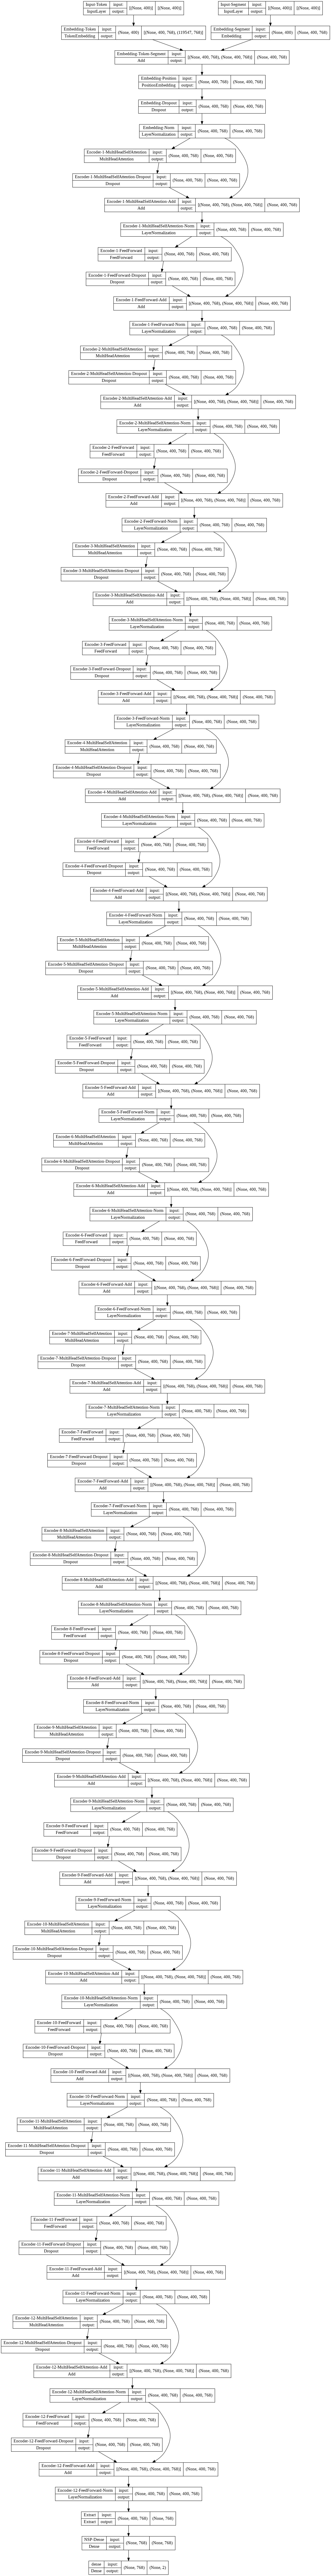

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train),val_data=(x_val, y_val), batch_size=8)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
1006/1006 [==============================] - 551s 530ms/step - loss: 0.6421 - accuracy: 0.6439
Epoch 2/1024
1006/1006 [==============================] - 207s 205ms/step - loss: 3.1566 - accuracy: 0.5455


done.
Visually inspect loss plot and select learning rate associated with falling loss


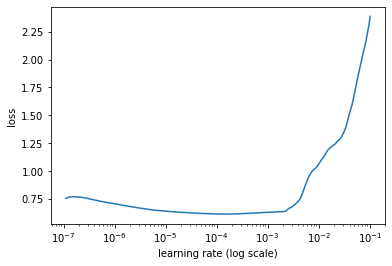

In [ ]:
learner.lr_find(show_plot=True)

In [ ]:
hist3 = learner.autofit(5e-5, 5, checkpoint_folder='bert_workshop')

# hist3 = learner.fit(5e-5, 3, cycle_len=1, cycle_mult=2)
# hist3 = learner.autofit(5e-5, 3, reduce_on_plateau=2, reduce_factor=5)



begin training using triangular learning rate policy with max lr of 5e-05...
Epoch 1/5
1006/1006 [==============================] - 573s 555ms/step - loss: 0.5450 - accuracy: 0.7224 - val_loss: 0.4732 - val_accuracy: 0.7665
Epoch 2/5
1006/1006 [==============================] - 554s 551ms/step - loss: 0.4988 - accuracy: 0.7520 - val_loss: 0.4515 - val_accuracy: 0.7866
Epoch 3/5
1006/1006 [==============================] - 554s 551ms/step - loss: 0.4744 - accuracy: 0.7654 - val_loss: 0.4607 - val_accuracy: 0.7799
Epoch 4/5
1006/1006 [==============================] - 554s 551ms/step - loss: 0.4379 - accuracy: 0.7890 - val_loss: 0.4555 - val_accuracy: 0.7933
Epoch 5/5
1006/1006 [==============================] - 554s 551ms/step - loss: 0.4092 - accuracy: 0.8140 - val_loss: 0.4856 - val_accuracy: 0.7844


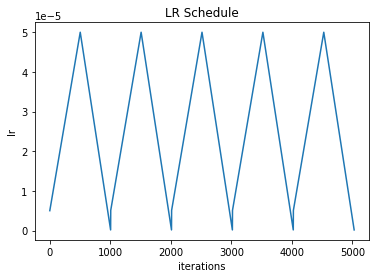

In [ ]:
learner.plot('lr')

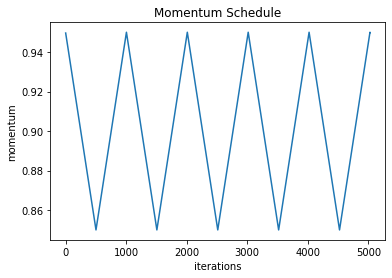

In [ ]:
learner.plot('momentum')

In [ ]:
h1 = go.Scatter(y=hist3.history['loss'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=hist3.history['val_loss'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
h1 = go.Scatter(y=hist3.history['accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=hist3.history['val_accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

load mdoel

In [ ]:
model.load_weights('/content/bert_workshop/weights-05.hdf5')

In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train),val_data=(x_val, y_val), batch_size=6)

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
cat = predictor.get_classes()
cat

['เดือดร้อน', 'ไม่เดือดร้อน']

In [ ]:
learner.validate(val_data=(x_val, y_val), class_names=cat)

              precision    recall  f1-score   support

   เดือดร้อน       0.70      0.68      0.69       314
ไม่เดือดร้อน       0.83      0.84      0.83       581

    accuracy                           0.78       895
   macro avg       0.76      0.76      0.76       895
weighted avg       0.78      0.78      0.78       895



array([[214, 100],
       [ 93, 488]])

In [ ]:
predictor.predict_proba("ฝ้ายจะไม่ทน กับคนนิสัยไม่ดี") 

array([0.7593274 , 0.24067259], dtype=float32)

In [ ]:
predictor.predict("ฝ้ายจะไม่ทน กับคนนิสัยไม่ดี") 

'เดือดร้อน'

In [ ]:
pretrain_name = 'bert_sentiment'

In [ ]:
predictor.save(pretrain_name)

In [ ]:
reloaded_predictor = ktrain.load_predictor(pretrain_name)

In [ ]:
reloaded_predictor.predict("ฝ้ายจะไม่ทน กับคนนิสัยไม่ดี")

'เดือดร้อน'

เทสกับช้อมูล

In [ ]:
df2 = pd.read_csv(file_name,encoding ='utf-8',  usecols=[0,2] ,names=['sentence','sentiment'], header=0)

In [ ]:
df2 = df2.drop_duplicates()

In [ ]:
เดือดร้อน2_df = df2[df.sentiment == "เดือดร้อน"] #df2.sentiment

In [ ]:
print(len(เดือดร้อน2_df))

3066


In [ ]:
ไม่เดือดร้อน2_df = df2[df.sentiment == "ไม่เดือดร้อน"] #df2.sentiment

In [ ]:
print(len(ไม่เดือดร้อน2_df))

5877


In [ ]:
test_df2 = pd.concat([เดือดร้อน2_df, ไม่เดือดร้อน2_df])
test_df2.sample(5)

,sentence,sentiment
387,@armypr_news การเคลื่อนย้ายผู้ติดเชื้อไวรัส CO...,ไม่เดือดร้อน
714,อรุณสวัสดิ์​ไอ่แสบทั้งสอง​ อากาศเย็นๆ​ กับน้อง...,ไม่เดือดร้อน
1289,@MinjiWc รอโควิดหมด แกมาเมื่อไหร่ พาไปเลย กระซ...,ไม่เดือดร้อน
4581,⏩ รายชื่อจังหวัดที่มีผู้ติดเชื้อ 10 อันดับแรก ...,ไม่เดือดร้อน
8672,ราชวิทยาลัยจุฬาภรณ์ ยุติฉีดวัคซีนโควิดเข็มแรกห...,เดือดร้อน


In [ ]:
test_df2.shape

(8943, 2)

In [ ]:
x_test = test_df2['sentence'].to_list()
x_test[:5]

['และแล้วธุรกิจสีเทา ของคนมีสี ก็ส่งผลกระทบกับ #ประชาชน อีกรอบ #รอบแล้วรอบเล่า #โควิด #ภาษีกู',
 'ผู้ป่วยรายวันเยอะขนาดนี้ แล้วเราจะรอดหรอวะ #โควิดวันนี้ #โควิด',
 'เปิดมาปีแรก\u200b ยิมก็จะปิดเพราะ\u200b covid\u200b อีกแล้ววว\u200b   คงต้องขายลูกๆโมเดลกินอีกแล้วสินะ\u200b 😢\n\n#covid_19\n#HappyNewYear2021\n#ปีใหม่2564 https://t.co/wFWZfx0sjK',
 '#azumasoba รีบทานก่อนโดนสั่งปิด #โควิด https://t.co/hFMS8Hsjey',
 'หลังปีใหม่  เรากับแฟนคิดตรงกันว่าหนักแน่ ขอให้ทุกคนเตรียมพร้อม  #เราจะสู้ไปด้วยกัน #Covid_19 #น่าน']

In [ ]:
y_test = test_df2['sentiment'].to_list()
y_test[:5]

['เดือดร้อน', 'เดือดร้อน', 'เดือดร้อน', 'เดือดร้อน', 'เดือดร้อน']

In [ ]:
preds = reloaded_predictor.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, preds)

In [ ]:
cm.shape

(2, 2)

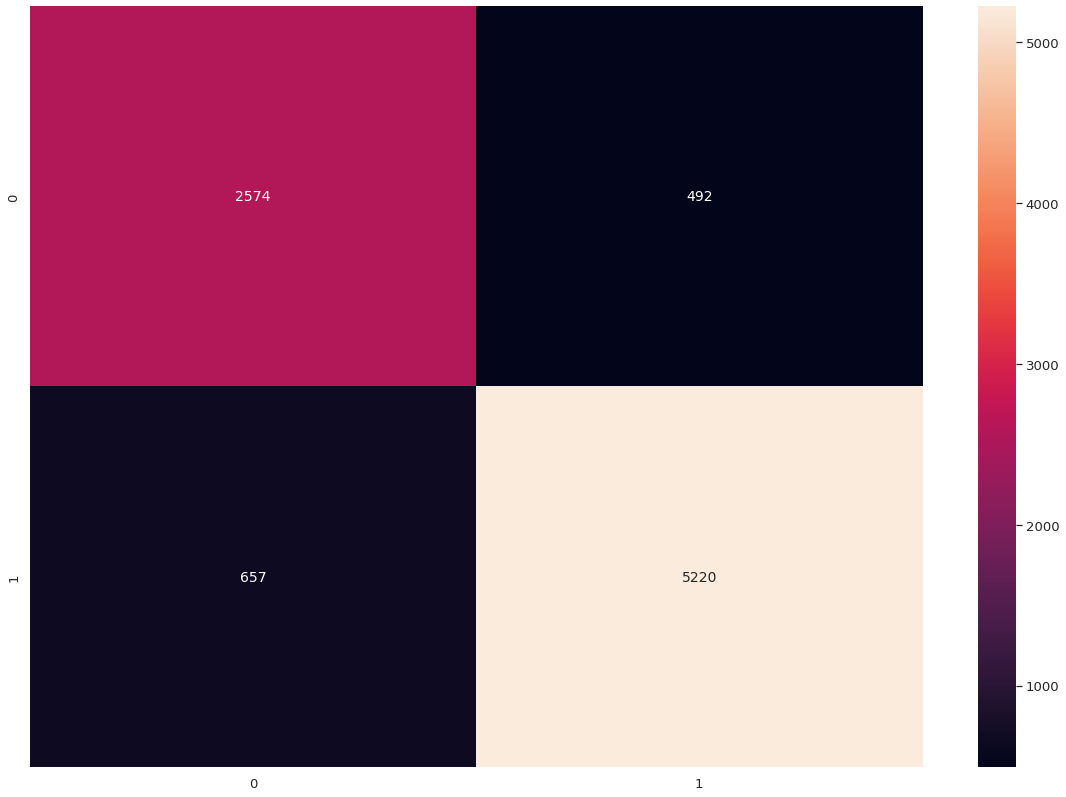

In [ ]:
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(20,14))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='g') # for num predict size

plt.show()

In [ ]:
print(classification_report(y_test, preds, target_names=cat, digits=4))

              precision    recall  f1-score   support

   เดือดร้อน     0.7967    0.8395    0.8175      3066
ไม่เดือดร้อน     0.9139    0.8882    0.9009      5877

    accuracy                         0.8715      8943
   macro avg     0.8553    0.8639    0.8592      8943
weighted avg     0.8737    0.8715    0.8723      8943

